In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats as st
import statistics as stat
image_data = nib.load('../images/T1.nii.gz').get_fdata()
image_data_v2 = nib.load('../images/T1_V2.nii.gz').get_fdata()

(array([1.73711e+05, 1.27644e+05, 1.11675e+05, 1.00912e+05, 9.42730e+04,
        9.19570e+04, 9.16990e+04, 9.36060e+04, 9.76300e+04, 1.04650e+05,
        1.14298e+05, 1.27742e+05, 1.45738e+05, 1.73148e+05, 1.98651e+05,
        2.15048e+05, 2.14278e+05, 1.95997e+05, 1.71507e+05, 1.46342e+05,
        1.26525e+05, 1.10747e+05, 9.96620e+04, 9.33850e+04, 9.43980e+04,
        1.08815e+05, 1.29427e+05, 1.15434e+05, 7.34950e+04, 4.40380e+04,
        2.98740e+04, 2.35160e+04, 1.95630e+04, 1.69190e+04, 1.40380e+04,
        1.16910e+04, 9.76600e+03, 8.30000e+03, 6.81600e+03, 5.68200e+03,
        4.65400e+03, 3.95700e+03, 3.18600e+03, 2.72000e+03, 2.28100e+03,
        1.78400e+03, 1.55300e+03, 1.33400e+03, 1.09600e+03, 9.52000e+02,
        7.59000e+02, 6.96000e+02, 5.67000e+02, 5.03000e+02, 4.96000e+02,
        4.08000e+02, 3.59000e+02, 3.27000e+02, 2.63000e+02, 2.80000e+02,
        2.46000e+02, 2.37000e+02, 2.57000e+02, 2.51000e+02, 2.04000e+02,
        2.07000e+02, 2.05000e+02, 1.72000e+02, 1.61

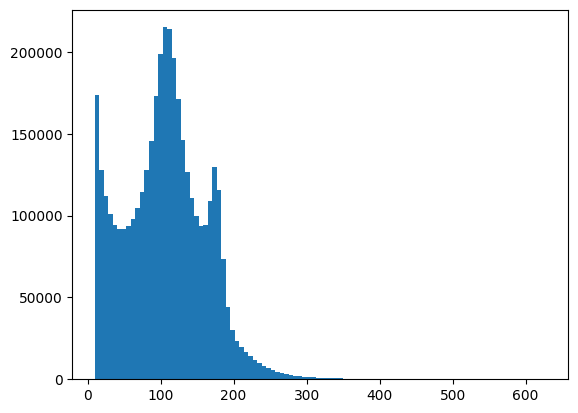

In [2]:
plt.hist(image_data[image_data>10].flatten(), 100)

In [3]:
def divide_histogram(image):
    # 1. Calcular el histograma de la imagen
    histogram = np.histogram(image, bins=256, range=(0, 255))[0]

    # 2. Dividir el histograma en tres secciones
    section_size = len(histogram) // 3
    section3 = histogram[2 * section_size:]

    peak3 = np.argmax(section3)
    ws = peak3 + 2 * section_size

    image_data_rescaled = (image / ws)

    # 4. Visualizar el histograma con el último pico escogido
    plt.hist(image[image>10].flatten(), 100)
    plt.axvline(peak3 + 2 * section_size, color='red', linestyle='--', label='Último Pico')
    plt.show()

    return image_data_rescaled


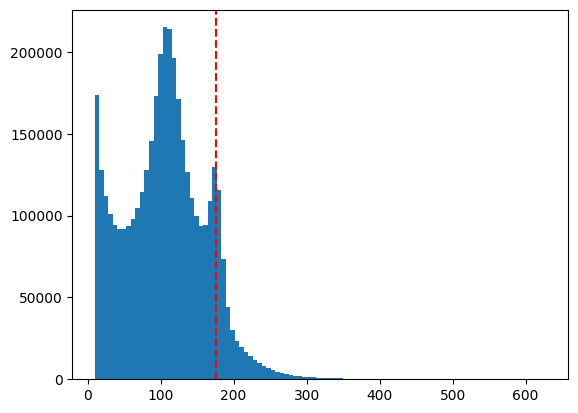

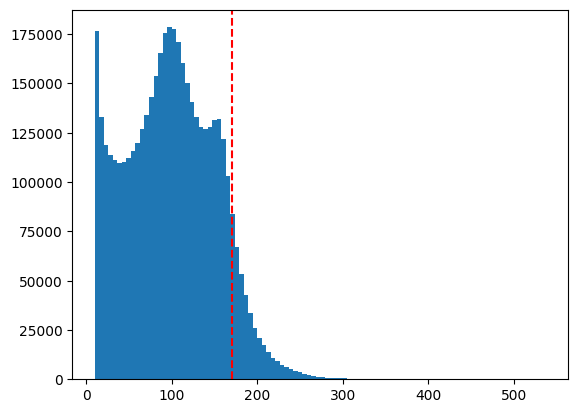

In [4]:
image_data_rescaled = divide_histogram(image_data)
image_data_rescaled_v2 = divide_histogram(image_data_v2)

(array([6.09896e+05, 2.32100e+05, 1.52663e+05, 1.26631e+05, 1.17752e+05,
        1.13967e+05, 1.11850e+05, 1.11719e+05, 1.12714e+05, 1.15834e+05,
        1.19854e+05, 1.25887e+05, 1.33685e+05, 1.41480e+05, 1.52003e+05,
        1.64632e+05, 1.75200e+05, 1.80893e+05, 1.81553e+05, 1.76110e+05,
        1.66162e+05, 1.55226e+05, 1.44335e+05, 1.36128e+05, 1.31067e+05,
        1.28637e+05, 1.29587e+05, 1.33171e+05, 1.34487e+05, 1.25355e+05,
        1.06512e+05, 8.66530e+04, 6.91020e+04, 5.51750e+04, 4.35220e+04,
        3.41740e+04, 2.63840e+04, 2.12560e+04, 1.73180e+04, 1.39590e+04,
        1.09860e+04, 9.16500e+03, 7.43600e+03, 6.18900e+03, 5.08500e+03,
        4.22300e+03, 3.36700e+03, 2.60200e+03, 2.14700e+03, 1.64800e+03,
        1.27900e+03, 1.04200e+03, 8.51000e+02, 7.09000e+02, 6.04000e+02,
        5.16000e+02, 3.88000e+02, 3.64000e+02, 2.78000e+02, 2.53000e+02,
        2.21000e+02, 2.05000e+02, 1.36000e+02, 1.31000e+02, 1.25000e+02,
        8.70000e+01, 7.40000e+01, 8.10000e+01, 7.30

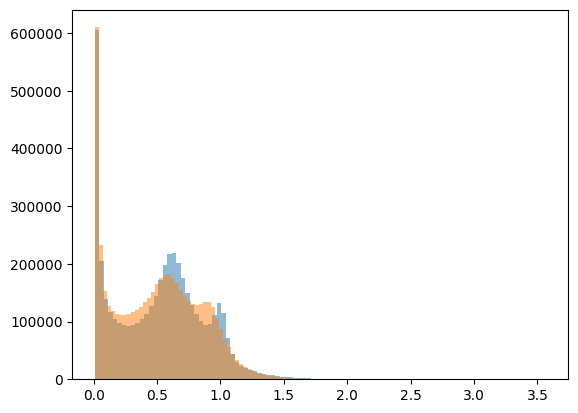

In [8]:
plt.hist(image_data_rescaled[image_data_rescaled>0.01].flatten(),100, alpha=0.5)
plt.hist(image_data_rescaled_v2[image_data_rescaled_v2>0.01].flatten(),100, alpha=0.5)